## Importing necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Define dataset path

In [8]:
DATADIR = "images/PetImages/"
CATEGORIES = ["cat", "dog"]
# Define image size and empty lists for data and labels
IMG_SIZE = 100
data = []
target = []

## Load and Preprocess Data

In [9]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(new_array)
            target.append(class_num)
        except Exception as e:
            pass

##  Convert lists to numpy arrays

In [11]:
data = np.array(data).reshape(-1, IMG_SIZE * IMG_SIZE)
target = np.array(target)

## Split Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

## Train the Support Vector Machine (SVM) Classifier with Epochs

C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2

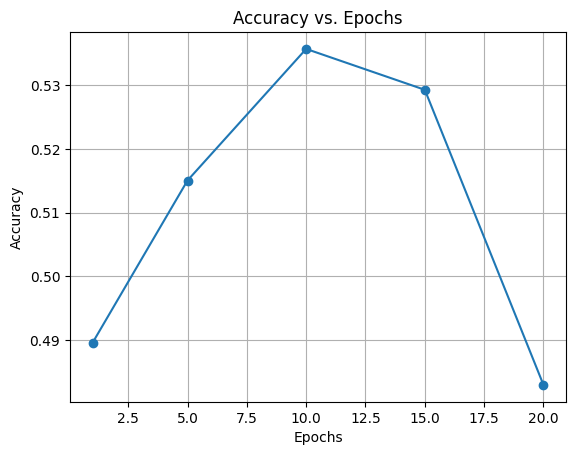

In [14]:
epochs = [1, 5, 10, 15, 20]
accuracy_scores = []

for epoch in epochs:
    svm_model = SVC(kernel='linear', random_state=42, max_iter=epoch)
    svm_model.fit(X_train, y_train)
    accuracy = svm_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)
# Plot Accuracy vs. Epochs
plt.plot(epochs, accuracy_scores, marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##  Evaluate the Model

In [15]:
predictions = svm_model.predict(X_test)

## Print classification report and confusion matrix

In [16]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.22      0.31      2547
           1       0.48      0.75      0.59      2443

    accuracy                           0.48      4990
   macro avg       0.48      0.49      0.45      4990
weighted avg       0.48      0.48      0.44      4990

[[ 571 1976]
 [ 604 1839]]


## Visualize results

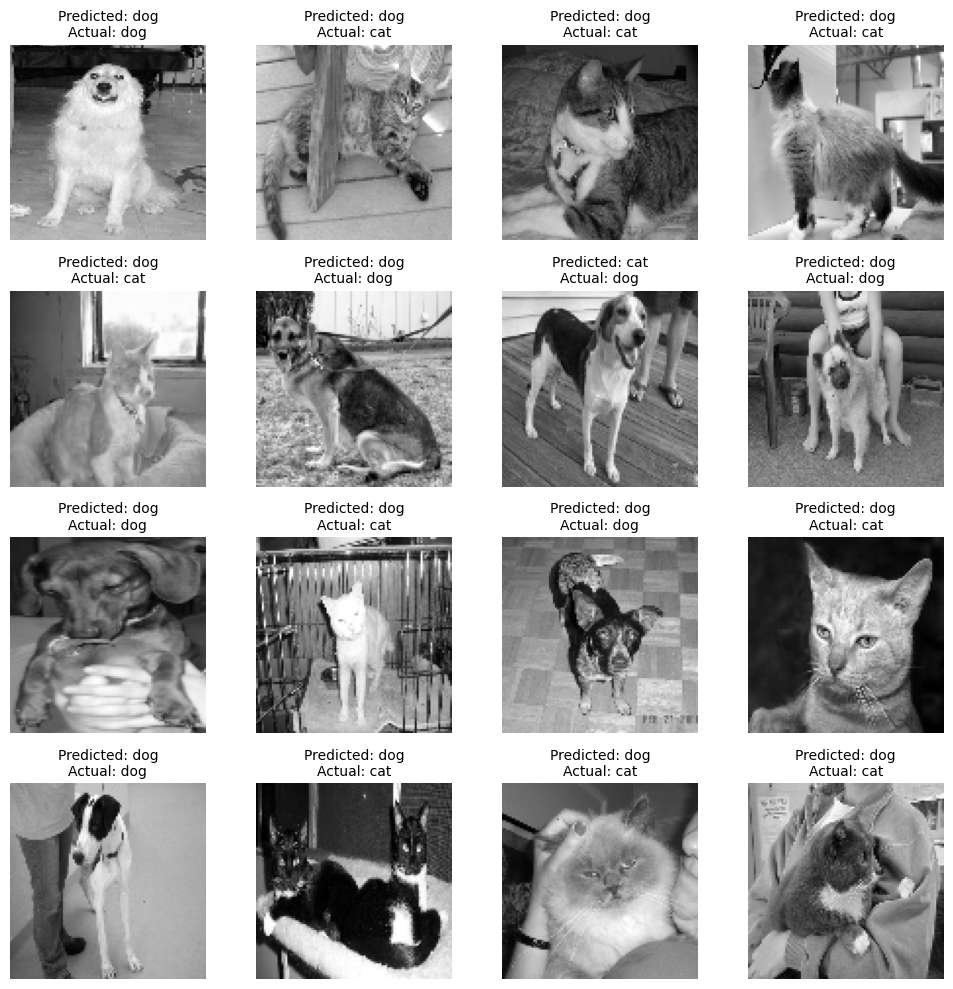

In [19]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicted: {CATEGORIES[predictions[i]]}\nActual: {CATEGORIES[y_test[i]]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()